In [1]:
import pandas as pd
import numpy as np
import requests
import datetime
import json
from matplotlib import pyplot
from datetime import date

# Yahoo Finance - Import yfinance package
import yfinance as yf

#functions
import finn_finance as f
from finn_finance import crypto_account

today = date.today()
day_1 = datetime.timedelta(1)
yesterday = today - day_1
get_yesterday = yesterday.strftime("%Y-%m-%d")


In [2]:
file = 'Coinbase-61c7c47cc8f40cd7a72cd6da-TransactionsHistoryReport-2022-06-29-05-48-54.csv'
data_coin = pd.read_csv(file, header=7)


In [3]:
# Set Lookback
lookback_window = 90

today = datetime.date.today()
days = datetime.timedelta(lookback_window)
lookback = today - days

start_date = lookback
end_date = today
print('Start Date: '+str(start_date))
print('End Date: '+str(end_date))

Start Date: 2022-04-18
End Date: 2022-07-17


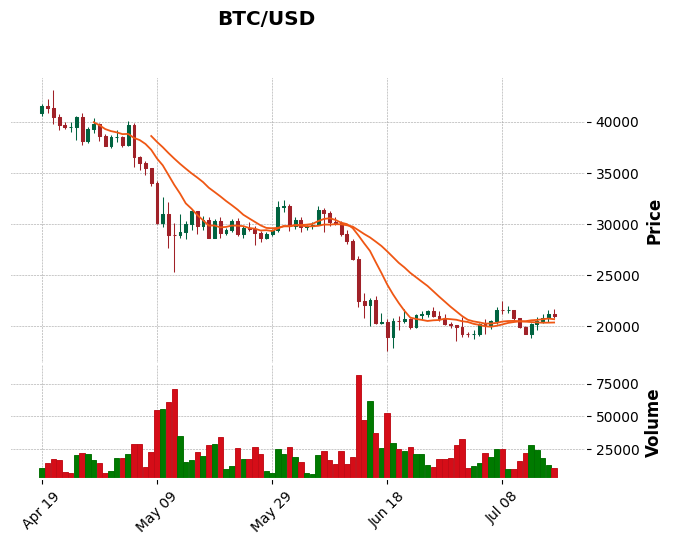

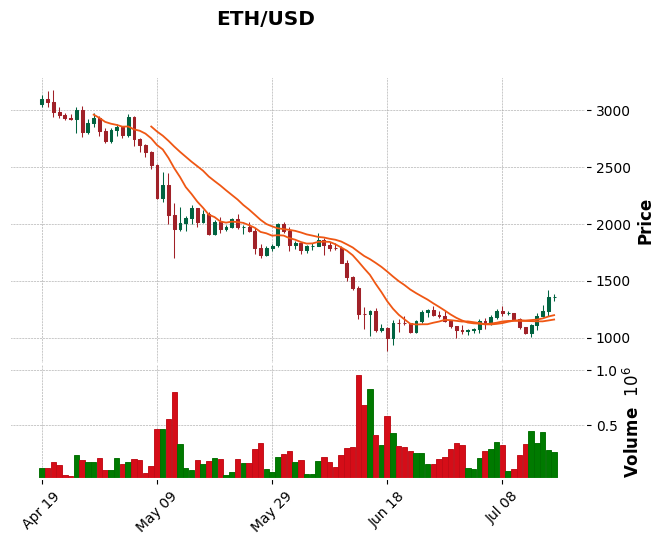

In [4]:
# Crypto data analysis
ticker_crypto = ['BTC/USD','ETH/USD']

for i in ticker_crypto:
    # Get the data
    data = f.fetch_daily_data(i)
    date_candle = pd.read_csv(data,index_col=['date'],parse_dates=True,chunksize=1000)
    date_candle = pd.concat((x.query("date > %a"%(start_date)) for x in date_candle))
    date_candle = date_candle.sort_values(by='date')

    f.candle_stick(date_candle,i)

Bitcoin Value on 2022-07-16 00:00:00: $5.8917898054063506e-05


Text(0.5, 1.0, 'Bitcoin Account Value')

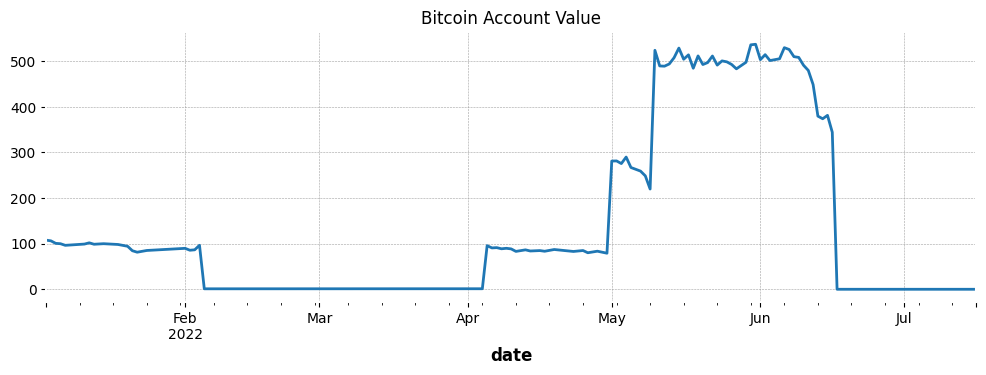

In [5]:
df_btc = crypto_account(data_coin).crypto_dollar_value(ticker='BTC/USD')

print('Bitcoin Value on '+str(df_btc.index.array[len(df_btc)-1])+': $'+str(df_btc.iloc[len(df_btc)-1]['account_value']['close']))
pyplot.rcParams["figure.figsize"] = [12, 3.50]
df_btc.plot.line(legend=None)
pyplot.title('Bitcoin Account Value')

Ethereum Value on 2022-07-16 00:00:00: $0.0016379407754069473


Text(0.5, 1.0, 'Ethereum Account Value')

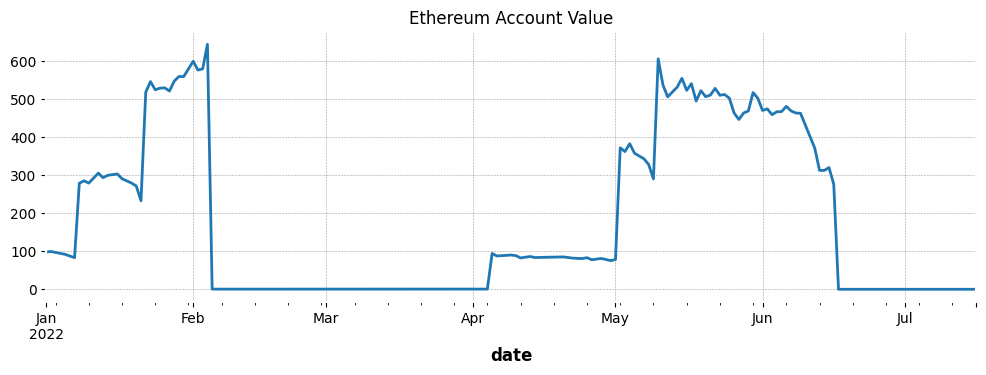

In [6]:
df_eth = crypto_account(data_coin).crypto_dollar_value(ticker='ETH/USD')

print('Ethereum Value on '+str(df_eth.index.array[len(df_eth)-1])+': $'+str(df_eth.iloc[len(df_eth)-1]['account_value']['close']))
pyplot.rcParams["figure.figsize"] = [12, 3.50]
df_eth.plot.line(legend=None)
pyplot.title('Ethereum Account Value')

In [7]:
dff_all = crypto_account(data_coin).total_value()
dff_all

print('Account Value on '+str(dff_all.index.array[len(dff_all)-1])+': $'+str(dff_all.iloc[len(dff_all)-1]['close']))
pyplot.rcParams["figure.figsize"] = [12, 3.50]
dff_all.plot.line(legend=None)
pyplot.title('Account Value')

,close
2022-01-01,97.739336
2022-01-02,99.378396
2022-01-03,205.450347
2022-01-04,204.447329
2022-01-05,192.548386
...,...
2022-07-12,0.001307
2022-07-13,0.001402
2022-07-14,0.001498
2022-07-15,0.001545
